In [ ]:
library(dada2)

In [ ]:
path = './data'

In [ ]:
list.files(path);

In [ ]:
fnFs <- sort(list.files(path, pattern="_16s_R1.fastq.gz", full.names = TRUE)) 
fnRs <- sort(list.files(path, pattern="_16s_R2.fastq.gz", full.names = TRUE)) 

In [5]:
plot_output<-plotQualityProfile(fnFs[1:4]);

Warning message:
“The `<scale>` argument of `guides()` cannot be `FALSE`. Use "none" instead as
of ggplot2 3.3.4.
ℹ The deprecated feature was likely used in the dada2 package.
  Please report the issue at <https://github.com/benjjneb/dada2/issues>.”


Warning message:
“Removed 26 rows containing missing values (`geom_tile()`).”


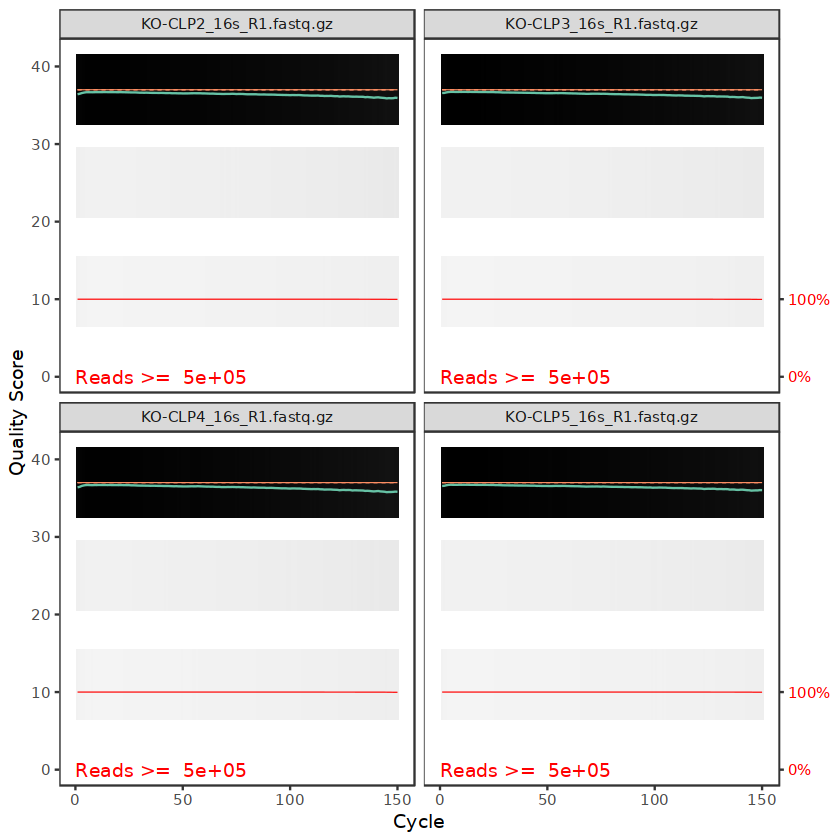

In [6]:
plot_output

Warning message:
“Removed 4 rows containing missing values (`geom_tile()`).”


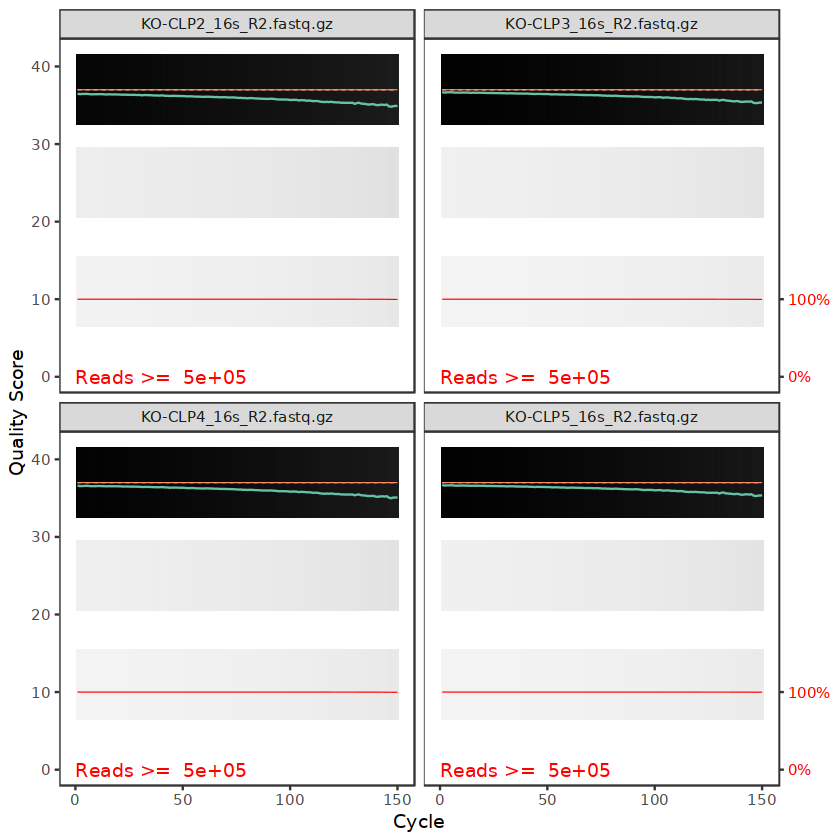

In [7]:
plotQualityProfile(fnRs[1:4])

In [ ]:
sample.names <- sapply(strsplit(basename(fnFs), "_"), `[`, 1)

In [ ]:
filtFs <- file.path(path, "filtered", paste0(sample.names, "_F_filt.fastq.gz"))
filtRs <- file.path(path, "filtered", paste0(sample.names, "_R_filt.fastq.gz"))

In [13]:
out <- filterAndTrim(fnFs, filtFs, fnRs, filtRs, truncLen=c(150,150),
                     maxN=0, maxEE=c(2,2), truncQ=2, rm.phix=TRUE,
                     compress=TRUE, multithread=T)
head(out)

,reads.in,reads.out
KO-CLP2_16s_R1.fastq.gz,19441564,18727575
KO-CLP3_16s_R1.fastq.gz,17378264,16827346
KO-CLP4_16s_R1.fastq.gz,13595451,13070352
KO-CLP5_16s_R1.fastq.gz,23613969,22927856
KO-CLP6_16s_R1.fastq.gz,20462439,19877716
KO-CLP7_16s_R1.fastq.gz,26446674,25712657


In [ ]:
errF <- learnErrors(filtFs, multithread=TRUE,nbases = 1e+10)
errR <- learnErrors(filtRs, multithread=TRUE,nbases = 1e+10)
plotErrors(errF, nominalQ=TRUE)
plotErrors(errR, nominalQ=TRUE)

In [ ]:
head(out)

In [ ]:
err = readRDS('./err.rds')

In [8]:
derepFs <- derepFastq(filtFs, verbose=TRUE)

Dereplicating sequence entries in Fastq file: ./data/filtered/KO-CLP1_F_filt.fastq.gz

.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
Encountered 14117908 unique sequences from 19940188 total sequences read.

Dereplicating sequence entries in Fastq file: ./data/filtered/KO-CLP2_F_filt.fastq.gz

.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
Encountered 13907645 unique sequences from 18727575 total sequences read.

Dereplicating sequence entries in Fastq file: ./data/filtered/KO-CLP3_F_filt.fastq.gz

.
.
.
.
.
.


In [ ]:
derepRs <- derepFastq(filtRs, verbose=TRUE)

In [ ]:
dadaFs <- dada(derepFs, err=err, multithread=TRUE)
dadaRs <- dada(derepRs, err=err, multithread=TRUE)

In [ ]:
mergers <- mergePairs(dadaFs, derepFs, dadaRs, derepRs, verbose=TRUE)

In [ ]:
seqtab <- makeSequenceTable(mergers)

In [ ]:
seqtab.nochim <- removeBimeraDenovo(seqtab, method="consensus", multithread=TRUE, verbose=TRUE)

In [ ]:
saveRDS(mergers,file = 'mergers.rds')